# Expected Use Visualizations

---

## ETL

In [1]:
import numpy as np
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt

In [2]:
glob.glob('./expected_use_data/*.xlsx')
pd.set_option('display.max_columns', 100)

['./expected_use_data/utah_fy20_expected_use.xlsx',
 './expected_use_data/montana_fy20_expected_use.xlsx',
 './expected_use_data/idaho_fy20_expected_use.xlsx',
 './expected_use_data/nevada_fy20_expected_use.xlsx']

In [3]:
df = pd.read_excel('./expected_use_data/idaho_fy20_expected_use.xlsx', index_col='PED\nAntigen')
df

,317_schedule_expected_use,CHIP_schedule_expected_use,STATE_schedule_expected_use,VFC_schedule_expected_use,TOTAL_schedule_expected_use,317_schedule_expected_pct,CHIP_schedule_expected_pct,STATE_schedule_expected_pct,VFC_schedule_expected_pct,317_actual_dose_use,...,317_expected_pct_applied_to_total,CHIP_expected_pct_applied_to_total,STATE_expected_pct_applied_to_total,VFC_expected_pct_applied_to_total,TOTAL_expected_pct_applied_to_total,317_variance,CHIP_variance,STATE_variance,VFC_variance,VFC variance as a % of VFC EU
PED Antigen,,,,,,,,,,,,,,,,,,,,,
DTAP,0,3742,38331,58421,100494,0.000000,0.037236,0.381426,0.581338,0,...,0.000000,3744.085219,38352.359842,58453.554939,100550.0,0.000000,1755.914781,-309.359842,-1446.554939,-0.024747
HEP A,0,3227,22664,32522,58413,0.000000,0.055245,0.387996,0.556760,0,...,0.000000,2411.424683,16936.017667,24302.557650,43650.0,0.000000,-151.424683,-374.017667,525.442350,0.021621
HEP B,2524,1704,35329,37806,77363,0.032625,0.022026,0.456665,0.488683,970,...,2257.352481,1523.981231,31596.674250,33811.992038,69190.0,-1287.352481,2136.018769,-4881.674250,4033.007962,0.119277
HIB,0,2464,28257,43572,74293,0.000000,0.033166,0.380345,0.586489,0,...,0.000000,2159.436824,24764.288291,38186.274885,65110.0,0.000000,1950.563176,-344.288291,-1606.274885,-0.042064
HPV,0,2891,19168,23616,45675,0.000000,0.063295,0.419661,0.517044,0,...,0.000000,2490.026054,16509.449808,20340.524138,39340.0,0.000000,-500.026054,-1567.449808,2067.475862,0.101643
IPV,0,2959,32539,49537,85035,0.000000,0.034797,0.382654,0.582548,0,...,0.000000,3012.066090,33122.547657,50425.386253,86560.0,0.000000,2107.933910,-529.547657,-1578.386253,-0.031301
MCV4,0,2177,14443,17792,34412,0.000000,0.063263,0.419708,0.517029,0,...,0.000000,2547.277258,16899.552336,20818.170406,40265.0,0.000000,-1122.277258,-1362.552336,2484.829594,0.119359
MENB,0,696,4616,5687,10999,0.000000,0.063278,0.419675,0.517047,0,...,0.000000,1062.445677,7046.335121,8681.219202,16790.0,0.000000,-552.445677,-530.335121,1082.780798,0.124727
MMR,0,2581,17929,26172,46682,0.000000,0.055289,0.384067,0.560644,0,...,0.000000,2390.695343,16607.042543,24242.262114,43240.0,0.000000,-230.695343,-127.042543,357.737886,0.014757


## Stacked bar graph

Columns used:
- `317_schedule_expected_use`
- `CHIP_schedule_expected_use`
- `STATE_schedule_expected_use`
- `VFC_schedule_expected_use`

- `317_actual_dose_use`
- `CHIP_actual_dose_use`
- `STATE_actual_dose_use`
- `VFC_actual_dose_use`

In [32]:
schedule = df[['VFC_schedule_expected_use',
               'CHIP_schedule_expected_use',
               'STATE_schedule_expected_use',
               '317_schedule_expected_use']].copy()
schedule.head()

,VFC_schedule_expected_use,CHIP_schedule_expected_use,STATE_schedule_expected_use,317_schedule_expected_use
PED Antigen,,,,
DTAP,58421,3742,38331,0
HEP A,32522,3227,22664,0
HEP B,37806,1704,35329,2524
HIB,43572,2464,28257,0
HPV,23616,2891,19168,0


In [33]:
actual = df[['VFC_actual_dose_use',
         'CHIP_actual_dose_use',
         'STATE_actual_dose_use',
         '317_actual_dose_use']].copy()
actual.head()

,VFC_actual_dose_use,CHIP_actual_dose_use,STATE_actual_dose_use,317_actual_dose_use
PED Antigen,,,,
DTAP,57007,5500,38043,0
HEP A,24828,2260,16562,0
HEP B,37845,3660,26715,970
HIB,36580,4110,24420,0
HPV,22408,1990,14942,0


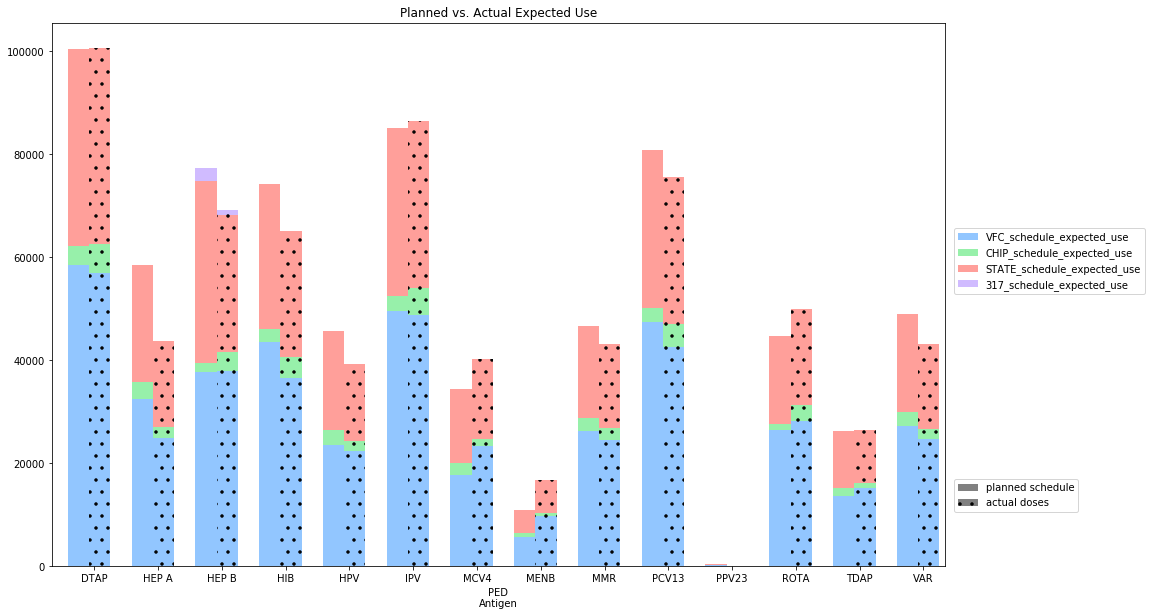

In [36]:
# Taken from StackOverflow:  https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H=".", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
       labels is a list of the names of the dataframe, used for the legend
       title is a string for the title of the plot
       H is the hatch used for identification of the different dataframe"""
    
    plt.figure(figsize=(16,10))
    plt.style.use('seaborn-pastel')
    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

plot_clustered_stacked([schedule, actual], labels = ['planned schedule', 'actual doses'], title = "Planned vs. Actual Expected Use")

## Stacked Bar Graph as a Percentage

In [45]:
schedules = df[['VFC_expected_pct_applied_to_total',
                'STATE_expected_pct_applied_to_total',
                'CHIP_expected_pct_applied_to_total',
                '317_expected_pct_applied_to_total',
                'TOTAL_expected_pct_applied_to_total']].copy()

schedules_pct = pd.DataFrame()

schedules_pct['VFC_expected_pct_applied_to_total'] = schedules['VFC_expected_pct_applied_to_total'] / schedules['TOTAL_expected_pct_applied_to_total']
schedules_pct['STATE_expected_pct_applied_to_total'] = schedules['STATE_expected_pct_applied_to_total'] / schedules['TOTAL_expected_pct_applied_to_total']
schedules_pct['CHIP_expected_pct_applied_to_total'] = schedules['CHIP_expected_pct_applied_to_total'] / schedules['TOTAL_expected_pct_applied_to_total']
schedules_pct['317_expected_pct_applied_to_total'] = schedules['317_expected_pct_applied_to_total'] / schedules['TOTAL_expected_pct_applied_to_total']

In [47]:
actuals = df[['VFC_actual_dose_use',
         'CHIP_actual_dose_use',
         'STATE_actual_dose_use',
         '317_actual_dose_use', 'TOTAL_actual_dose_use']].copy()

actuals_pct = pd.DataFrame()

actuals_pct['VFC_actual_dose_use_pct'] = actuals['VFC_actual_dose_use'] / actuals['TOTAL_actual_dose_use']
actuals_pct['STATE_actual_dose_use_pct'] = actuals['STATE_actual_dose_use'] / actuals['TOTAL_actual_dose_use']
actuals_pct['CHIP_actual_dose_use_pct'] = actuals['CHIP_actual_dose_use'] / actuals['TOTAL_actual_dose_use']
actuals_pct['317_actual_dose_use_pct'] = actuals['317_actual_dose_use'] / actuals['TOTAL_actual_dose_use']

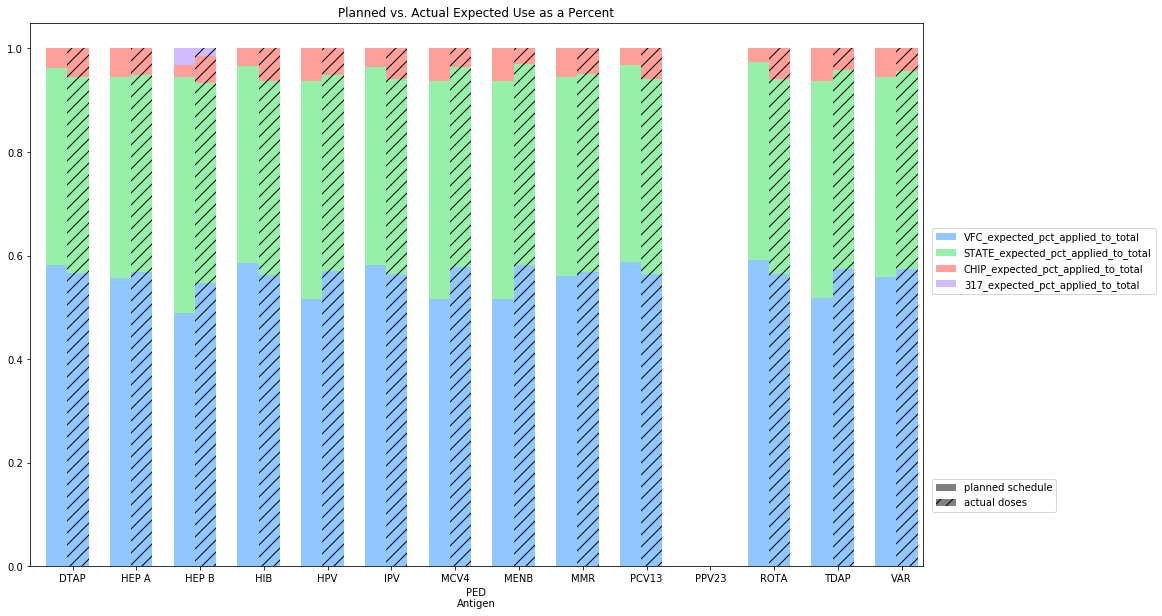

In [46]:
plot_clustered_stacked([schedules_pct, actuals_pct], labels = ['planned schedule', 'actual doses'], title = "Planned vs. Actual Expected Use as a Percent", H='//')